In [80]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
diabetes_df = pd.read_csv("diabetes.csv")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
# decision tree classifier
# deep and complex trees tend to overfit, so we want to
# generalize and have reasonably simple trees 
# as much as possible
model =tree.DecisionTreeClassifier(max_depth=4, random_state=42, )


In [83]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.75       151
           1       0.56      0.78      0.65        80

    accuracy                           0.71       231
   macro avg       0.70      0.73      0.70       231
weighted avg       0.75      0.71      0.72       231



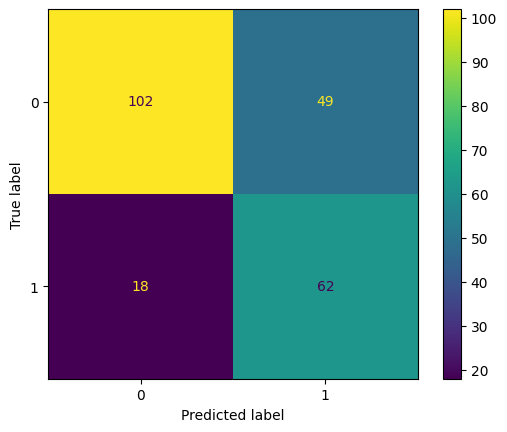

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [86]:
# recall 
# tp / (tp + fn)
62/(62+18)

0.7

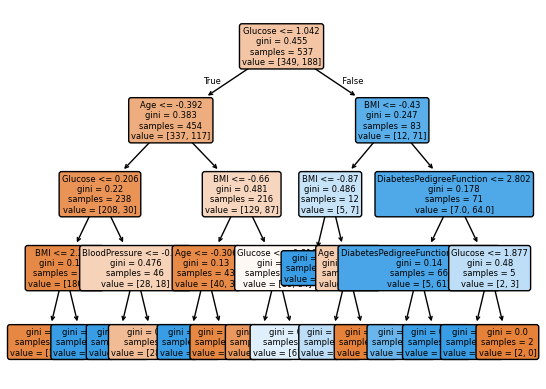

<Figure size 640x480 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names=list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

In [91]:
def format_names(people: list) -> list:
    final_str = ' '
    for n in range (0, len(people)):
        if n == len(people)-1:
            final_str = final_str + f"{people[-2]} & {people[-1]}"
        elif n < 1 :
            final_str = final_str + f"{people[n]}, "
    return final_str
people = [  'Niles',  'C.C.', 'Fran' ]
format_names(people)

' Niles, C.C. & Fran'